<a href="https://colab.research.google.com/github/FelixSchmid/ML_exercises/blob/master/Convolutional_Network_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: CIFAR-10 classification

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

> "consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

>The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class."

<img src="https://corochann.com/wp-content/uploads/2017/04/cifar10_plot.png">

### Categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

# Preliminaries

In [0]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l1
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.initializers import glorot_normal
# from tensorboardcolab import TensorBoardColab 

# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
seed(14)
from tensorflow import set_random_seed
set_random_seed(19)

Download the data if necessary and load it:

In [0]:
train, test = tf.keras.datasets.cifar10.load_data()

train_images, train_labels = train

valid_test_images, valid_test_labels = test

train_images = train_images / 255.

valid_test_images = valid_test_images / 255.

valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]

print(train_images.shape, valid_images.shape, test_images.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(50000, 32, 32, 3) (5000, 32, 32, 3) (5000, 32, 32, 3)
(50000, 1) (5000, 1) (5000, 1)


# Model

## Parameters

In [0]:
n_classes = 10

## Network

In [0]:
# adapted from https://github.com/jtopor/CUNY-MSDA-661/blob/master/CIFAR-CNN/TF-Layers-CIFAR-GITHUB-v3.py


tf.reset_default_graph()
clear_session   


# Model Patrameters
#######

rate1 = 0.50
rate2 = 0.50
epoch_count = 40
batch_size = 200

# Remember, we have pictures with 32x32 pixels and 3 color channels
x = Input(shape=(32, 32, 3))

# Convolutional Layer #1: (batch_size, 32, 32, 3) -> (batch_size, 32, 32, 64)
conv1 = Conv2D(filters = 64, kernel_size = (5,5), padding='same', activation='relu')(x)
 
# Pooling Layer #1: (batch_size, 32, 32, 64) -> (batch_size, 16, 16, 64)
pool1 = MaxPool2D(pool_size=(2,2), strides = 2)(conv1)

# Define a dropout layer with using the first dropout rate parameter
dropout1 = Dropout(rate=rate1)(pool1)

# Convolutional Layer #2: (batch_size, 16, 16, 64) -> (batch_size, 16, 16, 64)
conv2 = Conv2D(filters = 64, kernel_size = (5,5), padding='same', activation='relu')(dropout1)
  
# Pooling Layer #2: (batch_size, 16, 16, 64) -> (batch_size, 8, 8, 64)
pool2 = MaxPool2D(pool_size=(2,2), strides = 2)(conv2)

# Define a dropout layer with using the FIRST dropout rate parameter
dropout2 = Dropout(rate=rate1)(pool2)

# Convert tensors into vectors: (batch_size, 8, 8, 64) -> (batch_size, 4096)
pool2_flat = Flatten()(dropout2)

# Fully connected Layer #1: (batch_size, 4096)-> (batch_size, 512)
dense1 = Dense(512, activation = 'relu')(pool2_flat)

# Define a dropout layer with using the SECOND dropout rate parameter
dropout3 = Dropout(rate=rate2)(dense1)

# Dense Layer #1: (batch_size, 512)-> (batch_size, 256)
dense2 = Dense(256, activation = 'relu')(dropout3)

# Define a dropout layer with using the SECOND dropout rate parameter
dropout4 = Dropout(rate=rate2)(dense2)

# Logits layer: (batch_size, 256) -> (batch_size, 10)
predictions = Dense(10, activation = 'softmax')(dropout4)

# Full model
# Instantiate (initialize) the model with inputs and outputs
model = Model(inputs=x, outputs=predictions)

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxP

## Loss, optimization and compilation

In [0]:
# Loss 

loss = sparse_categorical_crossentropy # we use this cross entropy variant as the input is not 
                                       # one-hot encoded

# Optimizer
# Choose an optimizer - adaptive ones work well here
optimizer = 'adam'
 
# Compilation
#############

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

## Training

In [0]:
# tb=TensorBoard(log_dir='./Graph')
# tbc=TensorBoardColab(graph_path='./Graph')

history = model.fit(x=train_images, y=train_labels,
                    validation_data=(valid_images, valid_labels),
                    epochs=epoch_count,
                    batch_size=batch_size) #, callbacks=[tb])

Train on 50000 samples, validate on 5000 samples
Epoch 1/40
50000/50000 [==============================] - 7s 149us/sample - loss: 1.8493 - acc: 0.3102 - val_loss: 1.4646 - val_acc: 0.4720
Epoch 2/40
50000/50000 [==============================] - 5s 101us/sample - loss: 1.4537 - acc: 0.4749 - val_loss: 1.2448 - val_acc: 0.5552
Epoch 3/40
50000/50000 [==============================] - 5s 100us/sample - loss: 1.3082 - acc: 0.5333 - val_loss: 1.1246 - val_acc: 0.6068
Epoch 4/40
50000/50000 [==============================] - 5s 100us/sample - loss: 1.2097 - acc: 0.5715 - val_loss: 1.0317 - val_acc: 0.6418
Epoch 5/40
50000/50000 [==============================] - 5s 101us/sample - loss: 1.1330 - acc: 0.6001 - val_loss: 1.0221 - val_acc: 0.6422
Epoch 6/40
50000/50000 [==============================] - 5s 102us/sample - loss: 1.0778 - acc: 0.6233 - val_loss: 0.9550 - val_acc: 0.6702
Epoch 7/40
50000/50000 [==============================] - 5s 103us/sample - loss: 1.0377 - acc: 0.6361 - val_lo

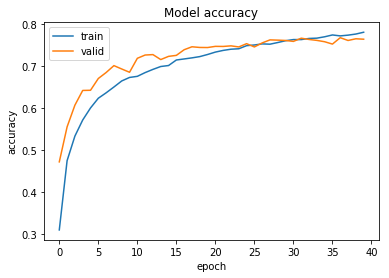

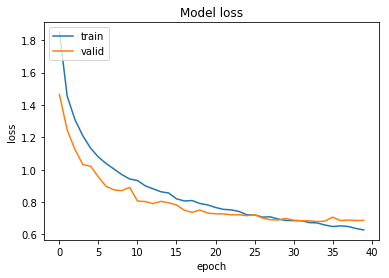

In [0]:
from matplotlib import pyplot as plt

def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    
display_history(history);

## Saving the model

In [0]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'